<a href="https://colab.research.google.com/github/An-tianqi/Machine-Learning/blob/main/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(891, 12)
(418, 11)


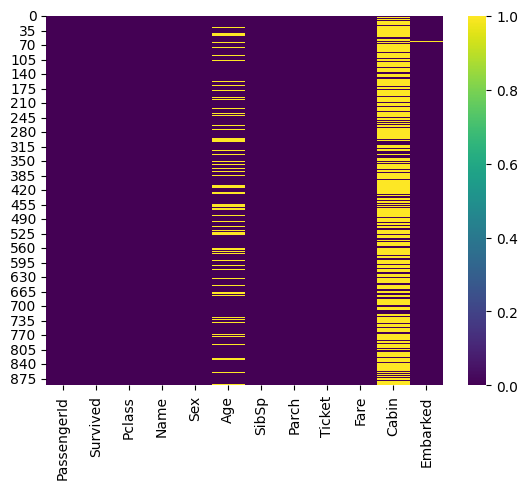

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gender_sub = pd.read_csv("./gender_submission.csv")
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

print(train.shape)
print(test.shape)

sns.heatmap(train.isnull(), cmap='viridis')
plt.show()



In [4]:
# le % d'âge des valeurs NaN

nan_percentage = (train['Age'].isnull().sum() / len(train)) * 100

print(nan_percentage)

19.865319865319865


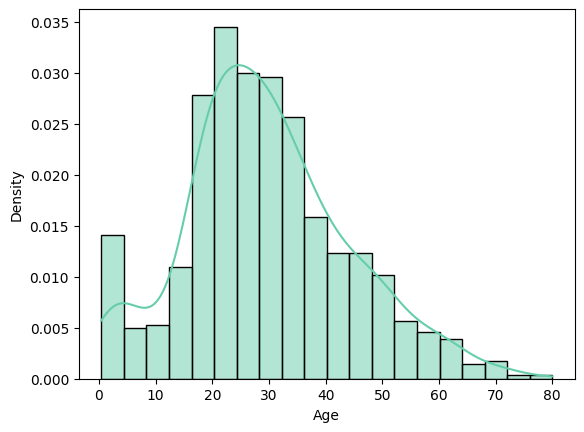

In [5]:
plt.figure()
sns.histplot(train['Age'], kde=True, stat="density", color="mediumaquamarine")
plt.show()


In [6]:
median = train['Age'].median()
mean = train['Age'].mean()

print(f"median : {median}")
print(f"moyenne : {mean}")

median : 28.0
moyenne : 29.69911764705882


In [7]:
# le % de Cabin des valeurs NaN

nan_percentage = (train['Cabin'].isnull().sum() / len(train)) * 100

print(nan_percentage)

77.10437710437711


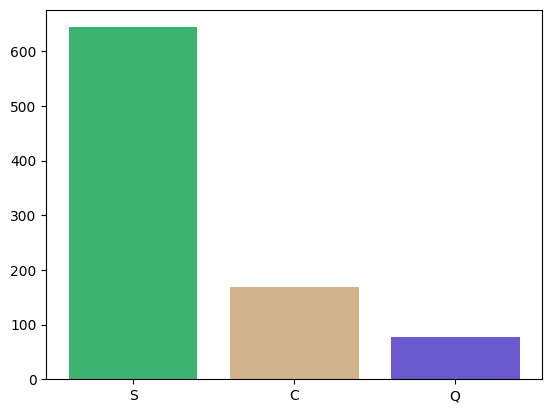

In [8]:
distribution = train['Embarked'].value_counts()

plt.bar(distribution.index, distribution.values, color=['mediumseagreen', 'tan', 'slateblue'])

plt.show()

In [9]:
# deep copy
newTrain = train.copy(deep=True)


newTrain["Age"] = newTrain["Age"].replace(np.nan, 28.0)

newTrain["Embarked"] = newTrain["Embarked"].replace(np.nan, "S")

my_cols = set(newTrain.columns)

my_cols.remove('Cabin')

newTrain2 = newTrain[my_cols]

newTrain2



<ipython-input-9-6ee6b00d1587>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  newTrain2 = newTrain[my_cols]


,Parch,Ticket,PassengerId,SibSp,Fare,Pclass,Age,Embarked,Survived,Name,Sex
0,0,A/5 21171,1,1,7.2500,3,22.0,S,0,"Braund, Mr. Owen Harris",male
1,0,PC 17599,2,1,71.2833,1,38.0,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,0,STON/O2. 3101282,3,0,7.9250,3,26.0,S,1,"Heikkinen, Miss. Laina",female
3,0,113803,4,1,53.1000,1,35.0,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,0,373450,5,0,8.0500,3,35.0,S,0,"Allen, Mr. William Henry",male
...,...,...,...,...,...,...,...,...,...,...,...
886,0,211536,887,0,13.0000,2,27.0,S,0,"Montvila, Rev. Juozas",male
887,0,112053,888,0,30.0000,1,19.0,S,1,"Graham, Miss. Margaret Edith",female
888,2,W./C. 6607,889,1,23.4500,3,28.0,S,0,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,0,111369,890,0,30.0000,1,26.0,C,1,"Behr, Mr. Karl Howell",male


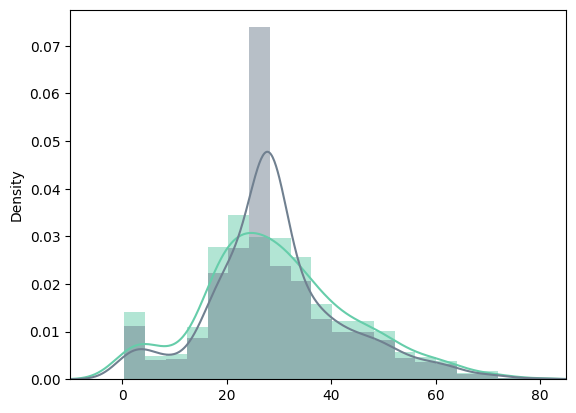

In [10]:
plt.figure()

plt.hist(train["Age"], bins=20, color='mediumaquamarine', density=True, stacked=True, alpha=0.5)
train["Age"].plot(kind='density', color='mediumaquamarine')

plt.hist(newTrain2["Age"], bins=20, color='slategrey', density=True, stacked=True, alpha=0.5)
newTrain2["Age"].plot(kind='density', color='slategrey')
plt.xlim(-10,85)
plt.show()


In [11]:
newTrain2['TravelAlone'] = (newTrain2['SibSp'] == 0) & (newTrain2['Parch'] == 0)

newTrain2['TravelAlone'] = newTrain2['TravelAlone'].astype(int)

newTrain2.drop(['SibSp', 'Parch'], axis=1, inplace=True)
newTrain2

,Ticket,PassengerId,Fare,Pclass,Age,Embarked,Survived,Name,Sex,TravelAlone
0,A/5 21171,1,7.2500,3,22.0,S,0,"Braund, Mr. Owen Harris",male,0
1,PC 17599,2,71.2833,1,38.0,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0
2,STON/O2. 3101282,3,7.9250,3,26.0,S,1,"Heikkinen, Miss. Laina",female,1
3,113803,4,53.1000,1,35.0,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0
4,373450,5,8.0500,3,35.0,S,0,"Allen, Mr. William Henry",male,1
...,...,...,...,...,...,...,...,...,...,...
886,211536,887,13.0000,2,27.0,S,0,"Montvila, Rev. Juozas",male,1
887,112053,888,30.0000,1,19.0,S,1,"Graham, Miss. Margaret Edith",female,1
888,W./C. 6607,889,23.4500,3,28.0,S,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,0
889,111369,890,30.0000,1,26.0,C,1,"Behr, Mr. Karl Howell",male,1


In [12]:
newTrain3 = pd.get_dummies(newTrain2, columns=["Pclass","Embarked","Sex"])

newTrain3

,Ticket,PassengerId,Fare,Age,Survived,Name,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,A/5 21171,1,7.2500,22.0,0,"Braund, Mr. Owen Harris",0,0,0,1,0,0,1,0,1
1,PC 17599,2,71.2833,38.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,0,1,0,0,1,0
2,STON/O2. 3101282,3,7.9250,26.0,1,"Heikkinen, Miss. Laina",1,0,0,1,0,0,1,1,0
3,113803,4,53.1000,35.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,0,0,0,1,1,0
4,373450,5,8.0500,35.0,0,"Allen, Mr. William Henry",1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,211536,887,13.0000,27.0,0,"Montvila, Rev. Juozas",1,0,1,0,0,0,1,0,1
887,112053,888,30.0000,19.0,1,"Graham, Miss. Margaret Edith",1,1,0,0,0,0,1,1,0
888,W./C. 6607,889,23.4500,28.0,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,0,0,1,0,0,1,1,0
889,111369,890,30.0000,26.0,1,"Behr, Mr. Karl Howell",1,1,0,0,1,0,0,0,1


In [13]:
newTrain3.drop(['PassengerId','Name','Sex_female','Ticket'], axis=1, inplace=True)

newTrain3

,Fare,Age,Survived,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,7.2500,22.0,0,0,0,0,1,0,0,1,1
1,71.2833,38.0,1,0,1,0,0,1,0,0,0
2,7.9250,26.0,1,1,0,0,1,0,0,1,0
3,53.1000,35.0,1,0,1,0,0,0,0,1,0
4,8.0500,35.0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,13.0000,27.0,0,1,0,1,0,0,0,1,1
887,30.0000,19.0,1,1,1,0,0,0,0,1,0
888,23.4500,28.0,0,0,0,0,1,0,0,1,0
889,30.0000,26.0,1,1,1,0,0,1,0,0,1


In [14]:
newTest = test.copy()
newTest["Age"].fillna(test["Age"].median(skipna=True), inplace=True)
newTest["Embarked"].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)
newTest.drop('Cabin', axis=1, inplace=True)

newTest.isnull().sum()

newTest['TravelAlone'] = (newTest['SibSp'] == 0) & (newTest['Parch'] == 0)

newTest['TravelAlone'] = newTest['TravelAlone'].astype(int)

newTest.drop(['SibSp', 'Parch'], axis=1, inplace=True)

newTest2 = pd.get_dummies(newTest, columns=["Pclass","Embarked","Sex"])

newTest2.drop(['PassengerId','Name','Sex_female','Ticket'], axis=1, inplace=True)


newTest2

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,0,1,0,0,1,1
414,39.0,108.9000,1,1,0,0,1,0,0,0
415,38.5,7.2500,1,0,0,1,0,0,1,1
416,27.0,8.0500,1,0,0,1,0,0,1,1


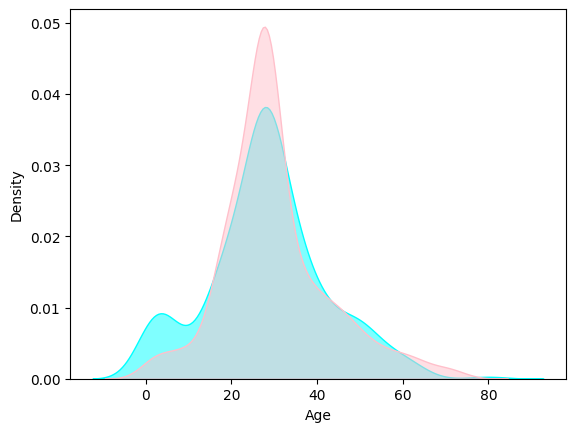

In [15]:
sns.kdeplot(newTrain3["Age"][newTrain3.Survived == 1], fill=True, alpha=0.5, color="cyan")
sns.kdeplot(newTrain3["Age"][newTrain3.Survived == 0], fill=True, alpha=0.5, color="pink")


plt.show()

In [16]:
newTrain3['IsMinor']=np.where((newTrain2["Age"])<16, 1, 0)

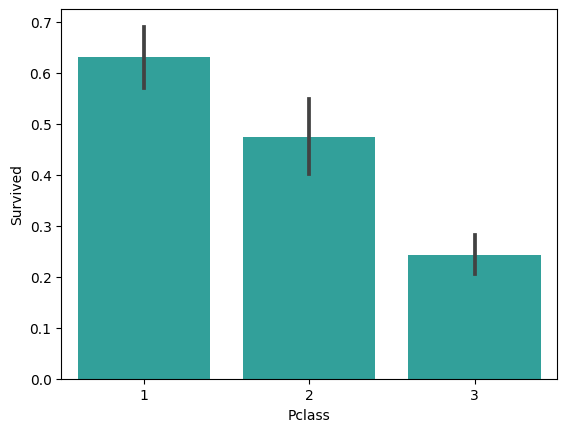

In [17]:
sns.barplot(x='Pclass', y='Survived', data=newTrain2, color="lightseagreen")

plt.show()

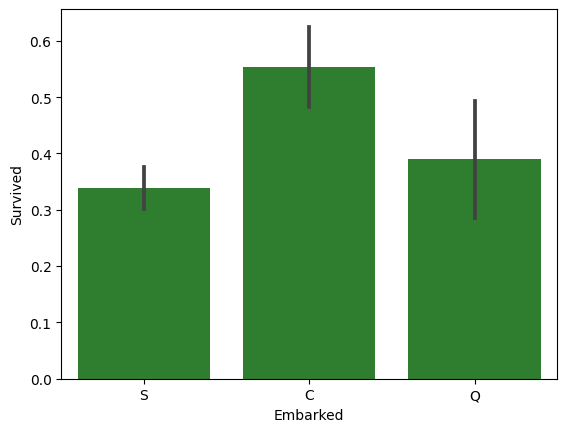

In [18]:
sns.barplot(x='Embarked', y='Survived', data=newTrain2, color="forestgreen")
plt.show()

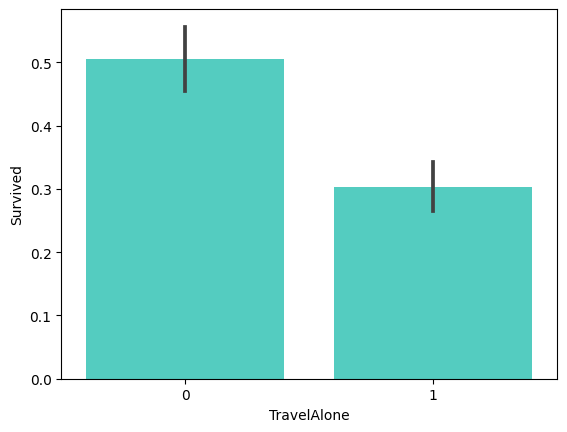

In [19]:
sns.barplot(x='TravelAlone', y='Survived', data=newTrain2, color="turquoise")
plt.show()

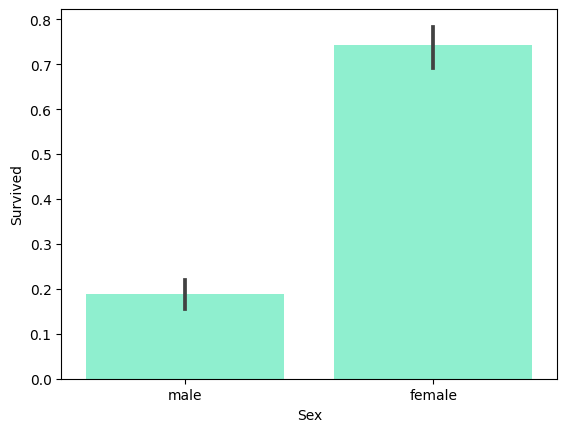

In [20]:
sns.barplot(x='Sex', y='Survived', data=newTrain2, color="aquamarine")
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


tab = ['Age','TravelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor']
X = newTrain3[tab]
Y = newTrain3['Survived']

lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X,Y)
selection = X.columns[rfe.support_]
print("Les features séléctionnée :", selection )

Les features séléctionnée : Index(['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,Y)
selected_features = X.columns[rfe.support_]
print("Les features séléctionnée :", selected_features )

Les features séléctionnée : Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
rfe = RFECV(lr, scoring='accuracy')
rfe.fit(X,Y)

print("Optimal number of features: ", rfe.n_features_)
print("Selected features: ", X.columns[rfe.support_])

Optimal number of features:  8
Selected features:  Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

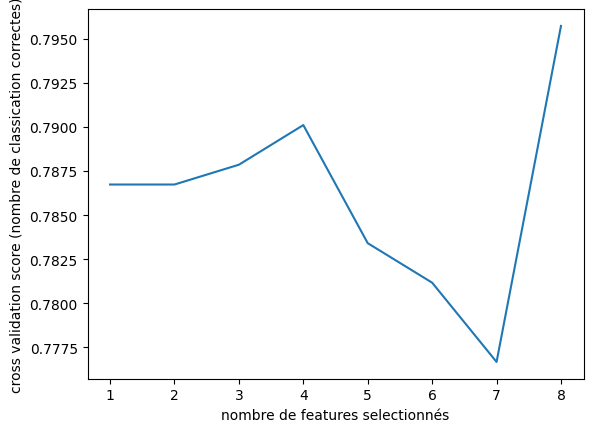

In [24]:
plt.xlabel("nombre de features selectionnés")
plt.ylabel("cross validation score (nombre de classication correctes)")
plt.plot(range(1, len(rfe.cv_results_['mean_test_score']) + 1), rfe.cv_results_['mean_test_score'])
plt.show()

In [26]:
feature = rfe.support_
selected_X = X.iloc[:, feature]

newModel = LogisticRegression()
newModel.fit(selected_X, Y)

print(selected_X.shape)
print(Y.shape)

(891, 8)
(891,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from seaborn.regression import lmplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
lm = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
y_pred_prob = lm.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

logloss = log_loss(y_test, y_pred_prob)
print(logloss)

auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print(auc)


0.8044692737430168
0.43226163193213346
0.8732947232947234
